# Sprint 1

## BBT2-5 - Clonar repositorio

In [3]:
!git clone https://github.com/alkemyTech/BBVA-BDS-W1-T2.git

Cloning into 'BBVA-BDS-W1-T2'...
remote: Enumerating objects: 57, done.
remote: Counting objects: 100% (40/40), done.
remote: Compressing objects: 100% (37/37), done.
remote: Total 57 (delta 21), reused 13 (delta 3), pack-reused 17
Receiving objects: 100% (57/57), 75.85 MiB | 12.21 MiB/s, done.
Resolving deltas: 100% (22/22), done.
Updating files: 100% (12/12), done.


## BBT2-12 - Crear una Base de datos

In [4]:
import sqlite3
# Crear una conexión a la base de datos SQLite
conn = sqlite3.connect('ecommerce.db')

In [5]:
# Crear un cursor para ejecutar consultas SQL
cursor = conn.cursor()

In [6]:
import pandas as pd

### Cargar csv

In [7]:
ecommerce_customers=pd.read_csv('/content/BBVA-BDS-W1-T2/datasets/Copia de ecommerce_customers_dataset.csv')#,index_col='customer_id'
ecommerce_customers.head()

ecommerce_order_items=pd.read_csv('/content/BBVA-BDS-W1-T2/datasets/Copia de ecommerce_order_items_dataset.csv')
ecommerce_order_items.head()

ecommerce_order_payments=pd.read_csv('/content/BBVA-BDS-W1-T2/datasets/Copia de ecommerce_order_payments_dataset.csv')
ecommerce_order_payments.head()

ecommerce_order_reviews=pd.read_csv('/content/BBVA-BDS-W1-T2/datasets/Copia de ecommerce_order_reviews_dataset.csv')
ecommerce_order_reviews.head()

ecommerce_orders=pd.read_csv('/content/BBVA-BDS-W1-T2/datasets/Copia de ecommerce_orders_dataset.csv')#,index_col='order_id'
ecommerce_orders.head()

ecommerce_products=pd.read_csv('/content/BBVA-BDS-W1-T2/datasets/Copia de ecommerce_products_dataset.csv')#,index_col='product_id'
ecommerce_products.head()

ecommerce_sellers=pd.read_csv('/content/BBVA-BDS-W1-T2/datasets/Copia de ecommerce_sellers_dataset.csv')#,index_col='product_id'
ecommerce_sellers.head()

product_category_name_translation=pd.read_csv('/content/BBVA-BDS-W1-T2/datasets/Copia de product_category_name_translation.csv')
product_category_name_translation.head()

ecommerce_geolocation=pd.read_csv('/content/BBVA-BDS-W1-T2/datasets/Copia de ecommerce_geolocation_dataset.csv')
ecommerce_geolocation.tail()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
1000158,99950,-28.068639,-52.010705,tapejara,RS
1000159,99900,-27.877125,-52.224882,getulio vargas,RS
1000160,99950,-28.071855,-52.014716,tapejara,RS
1000161,99980,-28.388932,-51.846871,david canabarro,RS
1000162,99950,-28.070104,-52.018658,tapejara,RS


### Guardar los DataFrames en la base de datos como tablas

In [8]:
# Guardar los DataFrames en la base de datos como tablas
ecommerce_customers.to_sql('customers', conn, if_exists='replace', index=False)

ecommerce_order_items.to_sql('order_items', conn, if_exists='replace', index=False)

ecommerce_order_payments.to_sql('order_payments', conn, if_exists='replace', index=False)

ecommerce_orders.to_sql('orders', conn, if_exists='replace', index=False)

ecommerce_products.to_sql('products', conn, if_exists='replace', index=False)

ecommerce_geolocation.to_sql('geolocation', conn, if_exists='replace', index=False)

ecommerce_order_reviews.to_sql('reviews', conn, if_exists='replace', index=False)

product_category_name_translation.to_sql('product_category_name_translation', conn, if_exists='replace', index=False)

ecommerce_sellers.to_sql('sellers', conn, if_exists='replace', index=False)

3095

In [9]:
# Exploración de los datos

products = pd.read_sql_query(
    '''
    SELECT *
    FROM product_category_name_translation
    ''',
    conn
)
products

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor
...,...,...
66,flores,flowers
67,artes_e_artesanato,arts_and_craftmanship
68,fraldas_higiene,diapers_and_hygiene
69,fashion_roupa_infanto_juvenil,fashion_childrens_clothes


## BBT2-15 - Crear un DataFrame que contenga el JOIN de la tabla customers y tabla orders. Extraer los datos de clientes con sus ordenes

In [10]:
#Crear un DataFrame que contenga el JOIN de la tabla customers y tabla orders.
#Extraer los datos de clientes con sus ordenes

customers_and_orders = pd.read_sql_query(
    '''
    SELECT c.*,o.*
    FROM customers c
    JOIN orders o ON
    o.customer_id=c.customer_id
    GROUP BY c.customer_id
    ''',
    conn
)
customers_and_orders.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,00012a2ce6f8dcda20d059ce98491703,248ffe10d632bebe4f7267f1f44844c9,6273,osasco,SP,5f79b5b0931d63f1a42989eb65b9da6e,00012a2ce6f8dcda20d059ce98491703,delivered,2017-11-14 16:08:26,2017-11-14 16:35:32,2017-11-17 15:32:08,2017-11-28 15:41:30,2017-12-04 00:00:00
1,000161a058600d5901f007fab4c27140,b0015e09bb4b6e47c52844fab5fb6638,35550,itapecerica,MG,a44895d095d7e0702b6a162fa2dbeced,000161a058600d5901f007fab4c27140,delivered,2017-07-16 09:40:32,2017-07-16 09:55:12,2017-07-19 19:09:37,2017-07-25 18:57:33,2017-08-04 00:00:00
2,0001fd6190edaaf884bcaf3d49edf079,94b11d37cd61cb2994a194d11f89682b,29830,nova venecia,ES,316a104623542e4d75189bb372bc5f8d,0001fd6190edaaf884bcaf3d49edf079,delivered,2017-02-28 11:06:43,2017-02-28 11:15:20,2017-03-01 15:24:20,2017-03-06 08:57:49,2017-03-22 00:00:00
3,0002414f95344307404f0ace7a26f1d5,4893ad4ea28b2c5b3ddf4e82e79db9e6,39664,mendonca,MG,5825ce2e88d5346438686b0bba99e5ee,0002414f95344307404f0ace7a26f1d5,delivered,2017-08-16 13:09:20,2017-08-17 03:10:27,2017-08-19 11:34:29,2017-09-13 20:06:02,2017-09-14 00:00:00
4,000379cdec625522490c315e70c7a9fb,0b83f73b19c2019e182fd552c048a22c,4841,sao paulo,SP,0ab7fb08086d4af9141453c91878ed7a,000379cdec625522490c315e70c7a9fb,delivered,2018-04-02 13:42:17,2018-04-04 03:10:19,2018-04-04 18:11:09,2018-04-13 20:21:08,2018-04-18 00:00:00


## BBT2-16 - Crear un DataFrame que contenga el JOIN de la tabla orders y tabla order_items. Extraer los datos de ordenes con sus items

In [11]:
#Crear un DataFrame que contenga el JOIN de la tabla orders y tabla order_items.
#Extraer los datos de ordenes con sus items

orders_and_order_items = pd.read_sql_query(
    '''
    SELECT oi.*, o.*
    FROM orders o
    JOIN order_items oi ON
    oi.order_id=o.order_id
    GROUP BY oi.order_id, product_id
    ''',
    conn
)
orders_and_order_items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,00010242fe8c5a6d1ba2dd792cb16214,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,2017-09-13 09:45:35,2017-09-19 18:34:16,2017-09-20 23:43:48,2017-09-29 00:00:00
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,00018f77f2f0320c557190d7a144bdd3,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,2017-04-26 11:05:13,2017-05-04 14:35:00,2017-05-12 16:04:24,2017-05-15 00:00:00
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,000229ec398224ef6ca0657da4fc703e,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,2018-01-14 14:48:30,2018-01-16 12:36:48,2018-01-22 13:19:16,2018-02-05 00:00:00
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,00024acbcdf0a6daa1e931b038114c75,d4eb9395c8c0431ee92fce09860c5a06,delivered,2018-08-08 10:00:35,2018-08-08 10:10:18,2018-08-10 13:28:00,2018-08-14 13:32:39,2018-08-20 00:00:00
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,00042b26cf59d7ce69dfabb4e55b4fd9,58dbd0b2d70206bf40e62cd34e84d795,delivered,2017-02-04 13:57:51,2017-02-04 14:10:13,2017-02-16 09:46:09,2017-03-01 16:42:31,2017-03-17 00:00:00


## BBT2-24 - Crear un DataFrame que contenga el JOIN de la tabla orders, tabla order_payments y customers. Extraer los datos de clientes con sus métodos de pagos por ciudad.

In [12]:
#Crear un DataFrame que contenga el JOIN de la tabla orders, tabla order_payments y customers.
#Extraer los datos de clientes con sus métodos de pagos por ciudad.

payment_type_client = pd.read_sql_query(
    '''
    SELECT c.customer_unique_id,c.customer_city,op.payment_type
    FROM customers c
    JOIN orders o ON
    c.customer_id=o.customer_id
    JOIN order_payments op ON
    op.order_id=o.order_id
    GROUP BY c.customer_id,op.payment_type
    ''',
    conn
)

#orders tiene order_id y customer_id
#customer tiene customer_id, customer_unique_id y customer_city y customer_state
#order_payments tiene order_id, payment_type

payment_type_client.head()

,customer_unique_id,customer_city,payment_type
0,248ffe10d632bebe4f7267f1f44844c9,osasco,credit_card
1,b0015e09bb4b6e47c52844fab5fb6638,itapecerica,credit_card
2,94b11d37cd61cb2994a194d11f89682b,nova venecia,credit_card
3,4893ad4ea28b2c5b3ddf4e82e79db9e6,mendonca,boleto
4,0b83f73b19c2019e182fd552c048a22c,sao paulo,boleto


# Sprint 2

## BBT2-25 - QUIERO: Filtrar el DataFrame de clientes y órdenes para resguardar las 3 órdenes más actuales de cada cliente.   
## PARA: Reducir el volumen de datos y trabajar solo con las últimas órdenes de los clientes

In [13]:
## Primero revisamos cuántas órdenes hay, descontando las órdenes que están canceladas

customer_qty_orders = pd.read_sql_query(
    '''
    SELECT c.customer_unique_id,o.order_id
    FROM customers c
    JOIN orders o ON
    o.customer_id=c.customer_id
    WHERE o.order_status != 'canceled'
    GROUP BY c.customer_unique_id
    ''',
    conn
)

# orders tiene order_purchase_timestamp
customer_qty_orders

,customer_unique_id,order_id
0,0000366f3b9a7992bf8c76cfdf3221e2,e22acc9c116caa3f2b7121bbb380d08e
1,0000b849f77a49e4a4ce2b2a4ca5be3f,3594e05a005ac4d06a72673270ef9ec9
2,0000f46a3911fa3c0805444483337064,b33ec3b699337181488304f362a6b734
3,0000f6ccb0745a6a4b88665a16c9f078,41272756ecddd9a9ed0180413cc22fb6
4,0004aac84e0df4da2b147fca70cf8255,d957021f1127559cd947b62533f484f7
...,...,...
95555,fffcf5a5ff07b0908bd4e2dbc735a684,725cf8e9c24e679a8a5a32cb92c9ce1e
95556,fffea47cd6d3cc0a88bd621562a9d061,c71b9252fd7b3b263aaa4cb09319a323
95557,ffff371b4d645b6ecea244b27531430a,fdc45e6c7555e6cb3cc0daca2557dbe1
95558,ffff5962728ec6157033ef9805bacc48,94d3ee0bc2a0af9d4fa47a4d63616e8d


In [14]:
## En segundo lugar, revisamos si existen clientes con más de 3 órdenes

customer_more_than_3_orders = pd.read_sql_query(
    '''
    SELECT c.customer_unique_id,COUNT(o.order_id)
    FROM customers c
    JOIN orders o ON
    o.customer_id=c.customer_id
    WHERE o.order_status != 'canceled'
    GROUP BY c.customer_unique_id
    HAVING COUNT(o.order_id) >3
    ORDER BY COUNT(o.order_id) DESC
    ''',
    conn
)

# orders tiene order_purchase_timestamp
customer_more_than_3_orders

,customer_unique_id,COUNT(o.order_id)
0,8d50f5eadf50201ccdcedfb9e2ac8455,17
1,3e43e6105506432c953e165fb2acf44c,9
2,ca77025e7201e3b30c44b472ff346268,7
3,6469f99c1f9dfae7733b25662e7f1782,7
4,1b6c7548a2a1f9037c1fd3ddfed95f33,7
5,f0e310a6839dce9de1638e0fe5ab282a,6
6,de34b16117594161a6a89c50b289d35a,6
7,dc813062e0fc23409cd255f7f53c7074,6
8,63cfc61cee11cbe306bff5857d00bfe4,6
9,47c1a3033b8b77b3ab6e109eb4d5fdf3,6


In [15]:
## QUERY FINAL

query_02 = '''
WITH Purchase_timestamp AS (
    SELECT
        c.*,
        o.*,
        oi.price,
        ROW_NUMBER() OVER(PARTITION BY c.customer_unique_id ORDER BY o.order_purchase_timestamp DESC) AS row_num
    FROM
        customers c
    INNER JOIN
        orders o ON o.customer_id=c.customer_id
    INNER JOIN
        order_items oi ON oi.order_id=o.order_id
    GROUP BY o.order_id
    HAVING o.order_status != 'canceled'
)

-- Seleccionar las tres compras más recientes de cada cliente
SELECT
    *
FROM
    Purchase_timestamp
WHERE
    row_num <= 3
ORDER BY
    row_num DESC,price DESC;
'''

top3_recent_orders_by_client = pd.read_sql_query(query_02, conn)
top3_recent_orders_by_client

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,customer_id:1,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,price,row_num
0,ec03908b046dc095ebb255624980a662,cef29e793e232d30250331804cdb7000,30620,belo horizonte,MG,62b86d4e40eb55d675e2ff8be00dd5e9,ec03908b046dc095ebb255624980a662,delivered,2017-03-09 18:15:38,2017-03-09 18:15:38,2017-03-16 11:27:58,2017-03-23 15:03:59,2017-04-04 00:00:00,834.56,3
1,e7a585d75baacb6b90108f280475324d,3de0c9303f39b7ccfe69ca11aee19cc6,12243,sao jose dos campos,SP,10ccb4dc0cc0d605b71afdcf4584128e,e7a585d75baacb6b90108f280475324d,delivered,2018-01-19 14:06:44,2018-01-19 14:17:18,2018-01-23 01:58:34,2018-02-10 13:36:49,2018-02-09 00:00:00,499.99,3
2,7d9a689797eeccd6d8e1da49e6c0ce0b,cbd08b04b3f301152b7570da5e9c8cc4,80730,curitiba,PR,8484c5fe4c5e00deaa868795d62d1db9,7d9a689797eeccd6d8e1da49e6c0ce0b,delivered,2017-09-13 12:37:57,2017-09-14 02:50:31,2017-09-15 21:24:47,2017-09-26 17:14:23,2017-10-03 00:00:00,429.90,3
3,7bfb0045f94740e851adc19d59cd53b3,d387ea85dc301a91740e31360d355686,13877,sao joao da boa vista,SP,6e49598a67a4161d3fe1299418fe5d43,7bfb0045f94740e851adc19d59cd53b3,delivered,2018-01-23 10:24:15,2018-01-23 15:07:15,2018-02-07 18:16:58,2018-02-19 13:12:01,2018-02-16 00:00:00,399.00,3
4,aa4178995eb97c7a31f3133c5b244651,47c1a3033b8b77b3ab6e109eb4d5fdf3,6634,jandira,SP,d003f1dd8a01261b3625598a4554f4a5,aa4178995eb97c7a31f3133c5b244651,delivered,2017-09-27 17:59:26,2017-09-29 02:58:33,2017-10-02 15:34:01,2017-10-04 00:53:33,2017-10-18 00:00:00,378.00,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98107,a790343ca6f3fee08112d678b43aa7c5,317cfc692e3f86c45c95697c61c853a6,13140,paulinia,SP,f1d5c2e6867fa93ceee9ef9b34a53cbf,a790343ca6f3fee08112d678b43aa7c5,delivered,2018-08-25 21:20:50,2018-08-25 21:30:15,2018-08-28 10:49:00,2018-08-29 18:19:41,2018-09-03 00:00:00,2.20,1
98108,fc3d1daec319d62d49bfb5e1f83123e9,4546caea018ad8c692964e3382debd19,5882,sao paulo,SP,8272b63d03f5f79c56e9e4120aec44ef,fc3d1daec319d62d49bfb5e1f83123e9,delivered,2017-07-16 18:19:25,2017-07-17 18:25:23,2017-07-20 15:45:53,2017-07-31 18:03:02,2017-07-28 00:00:00,1.20,1
98109,9f9d249355f63c5c1216a82b802452c1,b38211bd797f4fdd81a98b9d1754b606,25215,duque de caxias,RJ,6e864b3f0ec71031117ad4cf46b7f2a1,9f9d249355f63c5c1216a82b802452c1,delivered,2018-04-24 20:15:21,2018-04-24 20:33:18,2018-04-25 13:36:00,2018-05-04 19:32:53,2018-05-18 00:00:00,0.85,1
98110,161b6d415e8b3413c6609c70cf405b5a,d80730c15c647bc8f2ad77c908ba5ca9,13189,hortolandia,SP,3ee6513ae7ea23bdfab5b9ab60bffcb5,161b6d415e8b3413c6609c70cf405b5a,delivered,2018-04-24 11:01:06,2018-04-26 03:55:26,2018-04-26 13:28:00,2018-05-07 23:21:11,2018-05-17 00:00:00,0.85,1


In [16]:
## COMPROBACIÓN DE QUERY FINAL: elegimos un único cliente para ver que ese clientes tenga solamente 3 órdenes,
## y que sean las 3 más recientes

query_02 = '''
WITH Purchase_timestamp AS (
    SELECT
        c.*,
        o.*,
        oi.price,
        ROW_NUMBER() OVER(PARTITION BY c.customer_unique_id ORDER BY o.order_purchase_timestamp DESC) AS row_num
    FROM
        customers c
    INNER JOIN
        orders o ON o.customer_id=c.customer_id
    INNER JOIN
        order_items oi ON oi.order_id=o.order_id
    GROUP BY o.order_id
    HAVING o.order_status != 'canceled'
)

-- Seleccionar las tres compras más recientes de cada cliente
SELECT
    *
FROM
    Purchase_timestamp
WHERE
    row_num <= 3
AND customer_unique_id = 'cef29e793e232d30250331804cdb7000'
ORDER BY
    row_num DESC,price DESC;
'''

verificacion_top3_recent_orders_by_client = pd.read_sql_query(query_02, conn)
verificacion_top3_recent_orders_by_client

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,customer_id:1,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,price,row_num
0,ec03908b046dc095ebb255624980a662,cef29e793e232d30250331804cdb7000,30620,belo horizonte,MG,62b86d4e40eb55d675e2ff8be00dd5e9,ec03908b046dc095ebb255624980a662,delivered,2017-03-09 18:15:38,2017-03-09 18:15:38,2017-03-16 11:27:58,2017-03-23 15:03:59,2017-04-04 00:00:00,834.56,3
1,d375691b753ce7bc99190bc08b813003,cef29e793e232d30250331804cdb7000,30620,belo horizonte,MG,56c93a3f93a1e7eb24ed51a6931dc488,d375691b753ce7bc99190bc08b813003,delivered,2017-05-26 07:36:03,2017-05-27 02:50:20,2017-05-30 11:34:23,2017-06-05 19:05:47,2017-06-20 00:00:00,834.56,2
2,7c39396dbe338aaea1f5b19d509fc099,cef29e793e232d30250331804cdb7000,30620,belo horizonte,MG,3755e498bba48053cdac758b05dfef7c,7c39396dbe338aaea1f5b19d509fc099,delivered,2018-01-18 19:59:07,2018-01-19 08:32:32,2018-01-19 21:38:44,2018-01-20 17:46:42,2018-02-02 00:00:00,21.80,1


## BBT2-26 - QUIERO: Filtrar el DataFrame de órdenes e ítems de órdenes para resguardar los 3 items de mayor importe de compra.   
## PARA: Reducir el volumen de datos y trabajar solo con los ítems que mas ingreso generan.

In [17]:
## COMPROBAR CANTIDAD DE ORDENES, AGRUPANDO POR ORDER_ID Y PRODUCT_ID

orders_top3_price = pd.read_sql_query(
    '''
    SELECT oi.order_id, product_id,SUM(oi.price) AS sum_price,MAX(o.order_approved_at) AS order_approved_at
    FROM orders o
    JOIN order_items oi ON
    oi.order_id=o.order_id
    GROUP BY oi.order_id,product_id
    ORDER BY oi.price DESC
    ''',
    conn
)

# order_items tiene price	y freight_value

orders_top3_price

,order_id,product_id,sum_price,order_approved_at
0,0812eb902a67711a1cb742b3cdaa65ae,489ae2aa008f021502940f251d4cce7f,6735.00,2017-02-12 20:45:12
1,fefacc66af859508bf1a7934eab1e97f,69c590f7ffc7bf8db97190b6cb6ed62e,6729.00,2018-07-27 04:05:13
2,f5136e38d1a14a4dbd87dff67da82701,1bdf5e6731585cf01aa8169c7028d6ad,6499.00,2017-05-26 02:45:17
3,a96610ab360d42a2e5335a3998b4718a,a6492cc69376c469ab6f61d8f44de961,4799.00,2017-04-03 13:25:18
4,199af31afc78c699f0dbf71fb178d4d4,c3ed642d592594bb648ff4a04cee2747,4690.00,2017-04-19 15:50:15
...,...,...,...,...
102420,8272b63d03f5f79c56e9e4120aec44ef,05b515fdc76e888aada3c6d66c201dff,12.00,2017-07-17 18:25:23
102421,8272b63d03f5f79c56e9e4120aec44ef,270516a3f41dc035aa87d220228f844c,12.00,2017-07-17 18:25:23
102422,3ee6513ae7ea23bdfab5b9ab60bffcb5,8a3254bee785a526d548a81a9bc3c9be,0.85,2018-04-26 03:55:26
102423,6e864b3f0ec71031117ad4cf46b7f2a1,8a3254bee785a526d548a81a9bc3c9be,0.85,2018-04-24 20:33:18


In [18]:
query_02 = '''
WITH top_price_products_per_order AS (
    SELECT
    oi.order_id,
    product_id,
    SUM(oi.price) AS sum_price,
    MAX(o.order_approved_at) AS order_approved_at,
    ROW_NUMBER() OVER(PARTITION BY oi.order_id ORDER BY SUM(oi.price) DESC) AS row_num
    FROM orders o
    JOIN order_items oi ON
    oi.order_id=o.order_id
    GROUP BY oi.order_id,product_id
)

-- Seleccionar los 3 productos más altos de cada orden
SELECT
    *
FROM
    top_price_products_per_order
WHERE
    row_num <= 3
ORDER BY
    row_num DESC,sum_price DESC;
'''

orders_top3_price = pd.read_sql_query(query_02, conn)
orders_top3_price

,order_id,product_id,sum_price,order_approved_at,row_num
0,5202706af09cfff62208ae5a56926b6d,72f027cff2922e7c85a28976ca21a1bb,265.35,2018-04-06 03:28:27,3
1,25de47610b1fe93d066d999828c0fe57,b0edba4fd6456eab5a6b6201caf7b323,259.90,2018-03-19 10:14:45,3
2,8af5834451865606adcc31b165d6ae54,63094ac128b54dd72d511043411df079,250.00,2018-02-07 03:32:08,3
3,637617b3ffe9e2f7a2411243829226d0,b6ada73818651fe7e64be10653062ea2,239.70,2018-04-19 02:51:20,3
4,d4ab53c2b21a94c8b21d3008b2506ba2,3736d232d7b439822cdb4cfee973fba0,229.90,2017-07-26 02:25:36,3
...,...,...,...,...,...
102287,38bcb524e1c38c2c1b60600a80fc8999,680cc8535be7cc69544238c1d6a83fe8,2.90,2017-01-07 03:45:22,1
102288,e8bbc1d69fee39eee4c72cb5c969e39d,310dc32058903b6416c71faff132df9e,2.29,2017-09-13 19:25:38,1
102289,f1d5c2e6867fa93ceee9ef9b34a53cbf,46fce52cef5caa7cc225a5531c946c8b,2.20,2018-08-25 21:30:15,1
102290,3ee6513ae7ea23bdfab5b9ab60bffcb5,8a3254bee785a526d548a81a9bc3c9be,0.85,2018-04-26 03:55:26,1


In [19]:
## COMPROBACIÓN FUNCIONAMIENTO DE QUERY

query_02 = '''
WITH top_price_products_per_order AS (
    SELECT
    oi.order_id,
    product_id,
    SUM(oi.price) AS sum_price,
    MAX(o.order_approved_at) AS order_approved_at,
    ROW_NUMBER() OVER(PARTITION BY oi.order_id ORDER BY SUM(oi.price) DESC) AS row_num
    FROM orders o
    JOIN order_items oi ON
    oi.order_id=o.order_id
    GROUP BY oi.order_id,product_id
)

-- Seleccionar los 3 productos más altos de cada orden
SELECT
    *
FROM
    top_price_products_per_order
WHERE
    row_num <= 3
AND
   order_id='5202706af09cfff62208ae5a56926b6d'
ORDER BY
    row_num ASC;
'''

orders_top3_price_comprobacion = pd.read_sql_query(query_02, conn)
orders_top3_price_comprobacion

,order_id,product_id,sum_price,order_approved_at,row_num
0,5202706af09cfff62208ae5a56926b6d,83634a7abf56905fc9ab415328908de2,392.00,2018-04-06 03:28:27,1
1,5202706af09cfff62208ae5a56926b6d,9df7c1b358350fe845b77ee08c49600e,265.35,2018-04-06 03:28:27,2
2,5202706af09cfff62208ae5a56926b6d,72f027cff2922e7c85a28976ca21a1bb,265.35,2018-04-06 03:28:27,3


## **BBT2-34** (Fran)

QUIERO: Filtrar el DataFrame de órdenes tomando sólo aquellos compras realizadas tarjeta de crédito y cuyo importe sea mayor que el promedio de los pagos resguardando la información requerida junto con las ciudades de los clientes.

PARA: Reducir el volumen de datos y trabajar solo con aquelas órdenes que tienen un monto representativo con tarjeta de crédito y entender de que ciudades corresponden.

In [20]:
# QUIERO: Filtrar el DataFrame de órdenes tomando sólo aquellos compras realizadas tarjeta de crédito y cuyo importe sea mayor que el promedio de los pagos resguardando la información requerida junto con las ciudades de los clientes.
# PARA: Reducir el volumen de datos y trabajar solo con aquelas órdenes que tienen un monto representativo con tarjeta de crédito y entender de que ciudades corresponden.

credit_card_above_avg_by_cliente = pd.read_sql_query(
    '''
    SELECT c.customer_unique_id,c.customer_city,op.payment_type,SUM(op.payment_value) as sum_payment_value,o.order_purchase_timestamp
    FROM customers c
    JOIN orders o ON
    c.customer_id=o.customer_id
    JOIN order_payments op ON
    op.order_id=o.order_id
    GROUP BY c.customer_id,op.payment_type
    HAVING op.payment_type='credit_card'
    AND op.payment_value>(SELECT AVG(op.payment_value) as promedio_pago_tarj_credito
                          FROM order_payments op
                          WHERE op.payment_type='credit_card')
    ORDER BY op.payment_value DESC
    ''',
    conn
)

#orders tiene order_id y customer_id
#customer tiene customer_id, customer_unique_id y customer_city y customer_state
#order_payments tiene order_id, payment_type,payment_value

credit_card_above_avg_by_cliente.head()

,customer_unique_id,customer_city,payment_type,sum_payment_value,order_purchase_timestamp
0,0a0a92112bd4c708ca5fde585afaa872,rio de janeiro,credit_card,13664.08,2017-09-29 15:24:52
1,dc4802a71eae9be1dd28f5d788ceb526,campo grande,credit_card,6929.31,2017-02-12 20:37:36
2,da122df9eeddfedc1dc1f5349a1a690c,araruama,credit_card,4950.34,2017-04-01 15:58:40
3,5d0a2980b292d049061542014e8960bf,goiania,credit_card,4809.44,2018-07-12 12:08:36
4,eebb5dda148d3893cdaf5b5ca3040ccb,maua,credit_card,4764.34,2017-04-18 18:50:13


## **BBT2-35** (Fran)
QUIERO: Generar archivos .csv a partir del Dataframe generado de customers y orders.

Los archivos deben cumplir los siguientes requerimientos:

Contener cabecera.

Separador “,”.

Ser guardados en un directorio llamado Results\Analysis_A.

PARA: Resguardar los datos enriquecidos, según requerimiento.

In [21]:
#Para no crear la carpeta Results cada vez que se usa el entorno:
#importamos módulo Python del sist op.
import os

# Crear el directorio 'Results/' si no existe
output_directory = "Results"
if not os.path.exists(output_directory):
    os.makedirs(output_directory)

In [22]:
top3_recent_orders_by_client.to_csv('Results/Analysis_A.csv', index=False, sep=',', header=True)

## **BBT2-36** (Fran)
QUIERO: Generar archivos .csv a partir del Dataframe generado de orders y orders_items.

Los archivos deben cumplir los siguientes requerimientos:

Contener cabecera.

Separador “,”.

Ser guardados en un directorio llamado Results\Analysis_B.

PARA: Resguardar los datos enriquecidos, según requerimiento.

In [23]:
orders_top3_price.to_csv('Results/Analysis_B.csv', index=False, sep=',', header=True)

## **BBT2-44** (Fran)
QUIERO: Generar archivos .csv a partir del Dataframe generado de orders, payments y customers.

Los archivos deben cumplir los siguientes requerimientos:

Contener cabecera.

Separador “,”.

Ser guardados en un directorio llamado Results\Analysis_J.

PARA: Resguardar los datos enriquecidos, según requerimiento.

In [24]:
credit_card_above_avg_by_cliente.to_csv('Results/Analysis_J.csv', index=False, sep=',', header=True)

## **BBT2-45** (Fran)
QUIERO: Cargar los datos del análisis A generados en un DataFrame.

PARA: Poder analizar el conjunto de datos.

### Instalación de Spark

In [25]:
#Instalamos pyspark
!pip install pyspark

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 310.8/310.8 MB 2.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.4.1-py2.py3-none-any.whl size=311285387 sha256=769d17113e7803900816eadf95d94d7b951e92db4f6573cbd4c20a9277cd6a89
  Stored in directory: /root/.cache/pip/wheels/0d/77/a3/ff2f74cc9ab41f8f594dabf0579c2a7c6de920d584206e0834
Successfully built pyspark


In [26]:
#Importamos sesión spark
from pyspark.sql import SparkSession

In [27]:
#Creamos sesión "ecommerce"
spark=SparkSession.builder.appName('ecommerce').getOrCreate()

### Comienzo BBT2-45

In [28]:
dfs_analysis_A = spark.read.csv('/content/Results/Analysis_A.csv',inferSchema=True, header=True)

#Mostramos resultado sin registros duplicados
dfs_analysis_A.dropDuplicates().show(5)

+--------------------+--------------------+------------------------+--------------------+--------------+--------------------+--------------------+------------+------------------------+-------------------+----------------------------+-----------------------------+-----------------------------+------+-------+
|         customer_id|  customer_unique_id|customer_zip_code_prefix|       customer_city|customer_state|            order_id|       customer_id:1|order_status|order_purchase_timestamp|  order_approved_at|order_delivered_carrier_date|order_delivered_customer_date|order_estimated_delivery_date| price|row_num|
+--------------------+--------------------+------------------------+--------------------+--------------+--------------------+--------------------+------------+------------------------+-------------------+----------------------------+-----------------------------+-----------------------------+------+-------+
|030132d171907b3b3...|d387ea85dc301a917...|                   13877|sao j

## **BBT2-46** (Fran)
QUIERO: Cargar los datos del análisis B generados en un DataFrame.

PARA: Poder analizar el conjunto de datos.

In [29]:
dfs_analysis_B = spark.read.csv('/content/Results/Analysis_B.csv',inferSchema=True, header=True)

#Mostramos resultado sin registros duplicados
dfs_analysis_B.dropDuplicates().show(5)

+--------------------+--------------------+---------+-------------------+-------+
|            order_id|          product_id|sum_price|  order_approved_at|row_num|
+--------------------+--------------------+---------+-------------------+-------+
|5efc0b7fe9df7f0c5...|bdeca320bdf54d3cd...|     59.9|2018-03-25 16:10:28|      3|
|204e562a760b68ad7...|744846f62c7ba12b4...|     40.0|2017-06-12 14:02:42|      3|
|cc2999bc678cab094...|728cfef9eca3d8905...|     29.9|2017-07-05 17:36:24|      3|
|848b0561d4bc26f57...|1b7ce992a80ac036d...|    153.0|2017-11-27 19:19:02|      2|
|e75011be2ec3dec23...|96537ba8cc2b7b2d7...|    144.5|2017-01-19 14:50:07|      2|
+--------------------+--------------------+---------+-------------------+-------+
only showing top 5 rows



## **BBT2-54** (FRAN)
QUIERO: Cargar los datos del análisis J generados en un DataFrame.

PARA: Poder analizar el conjunto de datos.

In [30]:
dfs_analysis_J= spark.read.csv('/content/Results/Analysis_J.csv',inferSchema=True, header=True)

#Mostramos resultado sin registros duplicados
dfs_analysis_J.dropDuplicates().show(5)

+--------------------+--------------------+------------+-----------------+------------------------+
|  customer_unique_id|       customer_city|payment_type|sum_payment_value|order_purchase_timestamp|
+--------------------+--------------------+------------+-----------------+------------------------+
|34ff67eb3466a779b...|           sao paulo| credit_card|          2787.87|     2018-05-31 21:05:55|
|7a96eb0a685f5c19b...|         santa maria| credit_card|          2183.41|     2017-12-17 09:15:37|
|9a333bab1b87584cf...|espirito santo do...| credit_card|          1172.45|     2017-12-08 10:49:38|
|d676376ab8f82dbd6...|             formiga| credit_card|           1013.8|     2018-03-19 14:08:49|
|5531d719e72f20e61...|           sao paulo| credit_card|          1005.81|     2018-03-21 21:14:29|
+--------------------+--------------------+------------+-----------------+------------------------+
only showing top 5 rows



# **Sprint 3**

## **BBT2-55** (FRAN) - Creacion de vistas temporales, análisis **A**

In [31]:
# Crear una vista temporal
dfs_analysis_A.createOrReplaceTempView("vt_Analysis_A")

# A partir de la creación, ya se pueden ejecutar sentencias sql a ésa vista
query_A = spark.sql("SELECT * FROM vt_Analysis_A")
query_A.show(10)

+--------------------+--------------------+------------------------+--------------------+--------------+--------------------+--------------------+------------+------------------------+-------------------+----------------------------+-----------------------------+-----------------------------+------+-------+
|         customer_id|  customer_unique_id|customer_zip_code_prefix|       customer_city|customer_state|            order_id|       customer_id:1|order_status|order_purchase_timestamp|  order_approved_at|order_delivered_carrier_date|order_delivered_customer_date|order_estimated_delivery_date| price|row_num|
+--------------------+--------------------+------------------------+--------------------+--------------+--------------------+--------------------+------------+------------------------+-------------------+----------------------------+-----------------------------+-----------------------------+------+-------+
|ec03908b046dc095e...|cef29e793e232d302...|                   30620|     

## **BBT2-56** (FRAN) - Creacion de vistas temporales, análisis **B**

In [32]:
# Crear una vista temporal
dfs_analysis_B.createOrReplaceTempView("vt_Analysis_B")

# A partir de la creación, ya se pueden ejecutar sentencias sql a ésa vista
query_B = spark.sql("SELECT * FROM vt_Analysis_B")
query_B.show(10)

+--------------------+--------------------+------------------+-------------------+-------+
|            order_id|          product_id|         sum_price|  order_approved_at|row_num|
+--------------------+--------------------+------------------+-------------------+-------+
|5202706af09cfff62...|72f027cff2922e7c8...|            265.35|2018-04-06 03:28:27|      3|
|25de47610b1fe93d0...|b0edba4fd6456eab5...|             259.9|2018-03-19 10:14:45|      3|
|8af5834451865606a...|63094ac128b54dd72...|             250.0|2018-02-07 03:32:08|      3|
|637617b3ffe9e2f7a...|b6ada73818651fe7e...|239.70000000000002|2018-04-19 02:51:20|      3|
|d4ab53c2b21a94c8b...|3736d232d7b439822...|             229.9|2017-07-26 02:25:36|      3|
|4044c5fad995d0717...|a02d0123079f4ae96...|             228.0|2018-08-07 10:50:19|      3|
|6d5774791f826a27e...|b7d2c90f9161dc69f...|             219.0|2017-11-12 10:10:34|      3|
|19f9ab36cda8d833c...|b811b7a802d2bc88a...|             217.9|2017-05-26 16:02:51|      3|

## **BBT2-64** (FRAN) - Creacion de vistas temporales, análisis **J**

In [33]:
# Crear una vista temporal
dfs_analysis_J.createOrReplaceTempView("vt_Analysis_J")

# A partir de la creación, ya se pueden ejecutar sentencias sql a ésa vista
query_J = spark.sql("SELECT * FROM vt_Analysis_J")
query_J.show(10)

+--------------------+------------------+------------+-----------------+------------------------+
|  customer_unique_id|     customer_city|payment_type|sum_payment_value|order_purchase_timestamp|
+--------------------+------------------+------------+-----------------+------------------------+
|0a0a92112bd4c708c...|    rio de janeiro| credit_card|         13664.08|     2017-09-29 15:24:52|
|dc4802a71eae9be1d...|      campo grande| credit_card|          6929.31|     2017-02-12 20:37:36|
|da122df9eeddfedc1...|          araruama| credit_card|          4950.34|     2017-04-01 15:58:40|
|5d0a2980b292d0490...|           goiania| credit_card|          4809.44|     2018-07-12 12:08:36|
|eebb5dda148d3893c...|              maua| credit_card|          4764.34|     2017-04-18 18:50:13|
|48e1ac109decbb877...|       joao pessoa| credit_card|          4681.78|     2018-06-22 12:23:19|
|edde2314c6c30e864...|         sao paulo| credit_card|          4513.32|     2018-08-03 21:10:16|
|fa562ef24d41361e4..

## **BBT2-65** (FRAN) - Querys en spark SQL, análisis A

QUIERO: Generar una consulta que cumpla los siguientes puntos:
Totalizar por las órdenes más vendidas por cliente, año y mes sumando monto, calculando monto máximo, mínimo y promedio de compra.

PARA: Enriquecer el análisis de los datos según requerimiento. Para entender las frecuencia de compra y la incidencia por cliente.

In [34]:
query_A = spark.sql('''
    SELECT  customer_unique_id,
            YEAR(order_purchase_timestamp) as year,
            MAX(price) max_price,
            MIN(price) min_price,
            ROUND(AVG(price),2) as prom_precio
    FROM vt_Analysis_A
    GROUP BY customer_unique_id,YEAR(order_purchase_timestamp)
    ORDER BY COUNT(customer_unique_id) DESC
    ''')

query_A.show(10)

+--------------------+----+---------+---------+-----------+
|  customer_unique_id|year|max_price|min_price|prom_precio|
+--------------------+----+---------+---------+-----------+
|6222ef69df52b4ed7...|2017|     10.9|      9.9|      10.23|
|39104edef5e46d7b8...|2017|    47.49|    15.99|      32.16|
|a40096fc0a3862e9e...|2017|     39.0|      7.9|      21.27|
|5b3186d7cf904f2f9...|2017|    159.9|     49.0|     122.93|
|6bb535b0906b43e00...|2017|    338.5|     78.0|      216.5|
|4e2d666f4bbc94a8d...|2018|     49.9|    22.99|       40.3|
|1c628081cb579ed60...|2018|     79.9|     43.0|       56.3|
|d64023c35e5c1452c...|2018|     99.0|     22.0|      73.33|
|821e75291b1ad362e...|2018|    160.0|    160.0|      160.0|
|565448508b44312e8...|2017|     85.0|     85.0|       85.0|
+--------------------+----+---------+---------+-----------+
only showing top 10 rows



## **BBT2-66** (FRAN) - Querys en spark SQL, análisis B

QUIERO: Generar una consulta que cumpla los siguientes puntos:
Totalizar por las órdenes más vendidas año y mes de aprobacion de la orden sumando monto y promedio de compra.

PARA: Enriquecer el análisis de los datos según requerimiento. Para entender las frecuencia de compra y de aprobaciones.

In [35]:
query_B = spark.sql('''
      SELECT
            order_id,
            YEAR(order_approved_at) as year,
            ROUND(SUM(sum_price),2) as sum_price,
            ROUND(AVG(sum_price),2) as avg_price
      FROM
            vt_Analysis_B
      GROUP BY
            order_id,year
      ORDER BY
            sum_price DESC, avg_price DESC
      ''')


query_B.show(10)

+--------------------+----+---------+---------+
|            order_id|year|sum_price|avg_price|
+--------------------+----+---------+---------+
|03caa2c082116e1d3...|2017|  13440.0|  13440.0|
|736e1922ae60d0d6a...|2018|   7160.0|   7160.0|
|0812eb902a67711a1...|2017|   6735.0|   6735.0|
|fefacc66af859508b...|2018|   6729.0|   6729.0|
|f5136e38d1a14a4db...|2017|   6499.0|   6499.0|
|2cc9089445046817a...|2017|   5934.6|   5934.6|
|a96610ab360d42a2e...|2017|   4799.0|   4799.0|
|199af31afc78c699f...|2017|   4690.0|   4690.0|
|b4c4b76c642808cbe...|2018|   4599.9|   4599.9|
|8dbc85d1447242f3b...|2018|   4590.0|   4590.0|
+--------------------+----+---------+---------+
only showing top 10 rows



## **BBT2-74** (FRAN) - Querys en spark SQL, análisis J

QUIERO: Generar una consulta que cumpla los siguientes puntos:
Calcular el monto máximo de compra por ciudad, agrupando tambien por mes y año.

PARA: Enriquecer el análisis de los datos según requerimiento. Para entender variabilidad de preferencias de compra de los clientes por ciudad, mes a mes segun el medio de pago con tarjeta de crédito.

In [36]:
query_J = spark.sql('''
    SELECT
    customer_city,
    YEAR(order_purchase_timestamp) as year,
    MONTH(order_purchase_timestamp) as month,
    MAX(sum_payment_value) as max_payment_value
    FROM vt_Analysis_J
    WHERE payment_type='credit_card'
    GROUP BY customer_city,year,month
    ORDER BY customer_city,year,month
    ''')

query_J.show()

+-------------------+----+-----+-----------------+
|      customer_city|year|month|max_payment_value|
+-------------------+----+-----+-----------------+
|abadia dos dourados|2018|    3|           219.63|
|          abadiania|2018|    1|          1025.52|
|             abaete|2017|    5|           220.97|
|             abaete|2017|    7|           206.07|
|             abaete|2017|    8|           466.89|
|             abaete|2018|    6|            240.6|
|         abaetetuba|2017|    4|           283.66|
|         abaetetuba|2017|    6|          1537.04|
|         abaetetuba|2017|   12|           619.65|
|         abaetetuba|2018|    3|           164.45|
|         abaetetuba|2018|    5|           841.23|
|         abaetetuba|2018|    8|           700.53|
|            abaiara|2018|    5|           200.45|
|             abaira|2018|    8|           167.95|
|              abare|2017|    8|           166.48|
|       abelardo luz|2017|   11|           411.21|
|           abrantes|2017|   10

## **BBT2-75** (FRAN) - Carga de datos, generacion de archivos .parquet de análisis A

In [37]:
# Ruta donde se guardarán los resultados Parquet
ruta_resultados = "Results_Parquets/Analysis_A/"

# Guardar query_A como Parquet
query_A.write.mode("overwrite").parquet(ruta_resultados + "/query_A.parquet")

# Leer el archivo Parquet guardado
query_A.parquet_check = spark.read.parquet(ruta_resultados + "/query_A.parquet")

# Mostrar algunas filas para verificar el contenido
query_A.parquet_check.show(10)

+--------------------+----+---------+---------+-----------+
|  customer_unique_id|year|max_price|min_price|prom_precio|
+--------------------+----+---------+---------+-----------+
|f11821d908830e74a...|2017|    59.99|     17.9|      45.93|
|d64023c35e5c1452c...|2018|     99.0|     22.0|      73.33|
|39104edef5e46d7b8...|2017|    47.49|    15.99|      32.16|
|4e2d666f4bbc94a8d...|2018|     49.9|    22.99|       40.3|
|565448508b44312e8...|2017|     85.0|     85.0|       85.0|
|46958f708ade6b6a8...|2017|     35.9|     35.9|       35.9|
|6668e1ae499e2e9be...|2017|     69.9|    56.99|       65.6|
|a1874c5550d2f0bc1...|2018|    138.0|    27.99|      71.96|
|2e43e031f10de28e5...|2017|     69.9|     23.9|      46.13|
|c9b3b24308b1a4587...|2017|    209.0|    84.99|     167.66|
+--------------------+----+---------+---------+-----------+
only showing top 10 rows



## **BBT2-76** (FRAN) - Carga de datos, generacion de archivos .parquet de análisis B

In [38]:
# Ruta donde se guardarán los resultados Parquet
ruta_resultados = "Results_Parquets/Analysis_B/"

# Guardar query_B como Parquet
query_B.write.mode("overwrite").parquet(ruta_resultados + "/query_B.parquet")

# Leer el archivo Parquet guardado
query_B.parquet_check = spark.read.parquet(ruta_resultados + "/query_B.parquet")

# Mostrar algunas filas para verificar el contenido
query_B.parquet_check.show(10)

+--------------------+----+---------+---------+
|            order_id|year|sum_price|avg_price|
+--------------------+----+---------+---------+
|a6ddd2889891733e0...|2018|     89.8|     89.8|
|0a4e4a3dd6cacc3db...|2017|     89.8|     89.8|
|ddad987b1ab585281...|2018|     89.8|     89.8|
|7bbf1280be83a8ea2...|2017|     89.8|     89.8|
|e3f6de94179bede86...|2018|     89.8|     89.8|
|88c58a28309ec4058...|2017|     89.8|     89.8|
|48251a875839d15f5...|2018|     89.8|     89.8|
|fec1d349e48ee1bf9...|2017|     89.8|     89.8|
|542d82c2299fd9224...|2017|     89.8|     89.8|
|845d8a54af235bee2...|2017|     89.8|     89.8|
+--------------------+----+---------+---------+
only showing top 10 rows



## **BBT2-84** (FRAN) - Carga de datos, generacion de archivos .parquet de análisis J

In [39]:
# Ruta donde se guardarán los resultados Parquet
ruta_resultados = "Results_Parquets/Analysis_J/"

# Guardar query_J como Parquet
query_J.write.mode("overwrite").parquet(ruta_resultados + "/query_J.parquet")

# Leer el archivo Parquet guardado
query_J.parquet_check = spark.read.parquet(ruta_resultados + "/query_J.parquet")

# Mostrar algunas filas para verificar el contenido
query_J.parquet_check.show(10)

+-------------------+----+-----+-----------------+
|      customer_city|year|month|max_payment_value|
+-------------------+----+-----+-----------------+
|abadia dos dourados|2018|    3|           219.63|
|          abadiania|2018|    1|          1025.52|
|             abaete|2017|    5|           220.97|
|             abaete|2017|    7|           206.07|
|             abaete|2017|    8|           466.89|
|             abaete|2018|    6|            240.6|
|         abaetetuba|2017|    4|           283.66|
|         abaetetuba|2017|    6|          1537.04|
|         abaetetuba|2017|   12|           619.65|
|         abaetetuba|2018|    3|           164.45|
+-------------------+----+-----+-----------------+
only showing top 10 rows



## **BBT2-90** (FRAN) - Creación de Visualización para Análisis B

In [40]:
query_B = spark.sql('''
      SELECT
            YEAR(order_approved_at) as Year,
            MONTH(order_approved_at) as Month,
            ROUND(SUM(sum_price)) as total_price,
            ROUND(AVG(sum_price)) as avg_price_per_order
      FROM
            vt_Analysis_B
      GROUP BY
            Year,Month
      HAVING year IS NOT NULL
      ORDER BY
            Year,Month
      ''')

query_B.show(30)

+----+-----+-----------+-------------------+
|Year|Month|total_price|avg_price_per_order|
+----+-----+-----------+-------------------+
|2016|    9|      135.0|              135.0|
|2016|   10|    49492.0|              152.0|
|2016|   12|       11.0|               11.0|
|2017|    1|   114801.0|              147.0|
|2017|    2|   247371.0|              139.0|
|2017|    3|   370543.0|              135.0|
|2017|    4|   357639.0|              147.0|
|2017|    5|   506899.0|              133.0|
|2017|    6|   436935.0|              131.0|
|2017|    7|   492258.0|              121.0|
|2017|    8|   572834.0|              128.0|
|2017|    9|   614666.0|              139.0|
|2017|   10|   669366.0|              142.0|
|2017|   11|   993813.0|              130.0|
|2017|   12|   765096.0|              128.0|
|2018|    1|   942667.0|              127.0|
|2018|    2|   837063.0|              122.0|
|2018|    3|   992802.0|              133.0|
|2018|    4|   976326.0|              138.0|
|2018|    

In [41]:
#Importamos pandas, seaborn y pyplot de matplotlib
import pandas as pd
import matplotlib as plt
import matplotlib.pyplot as plt
import matplotlib.ticker as tick
import seaborn as sns

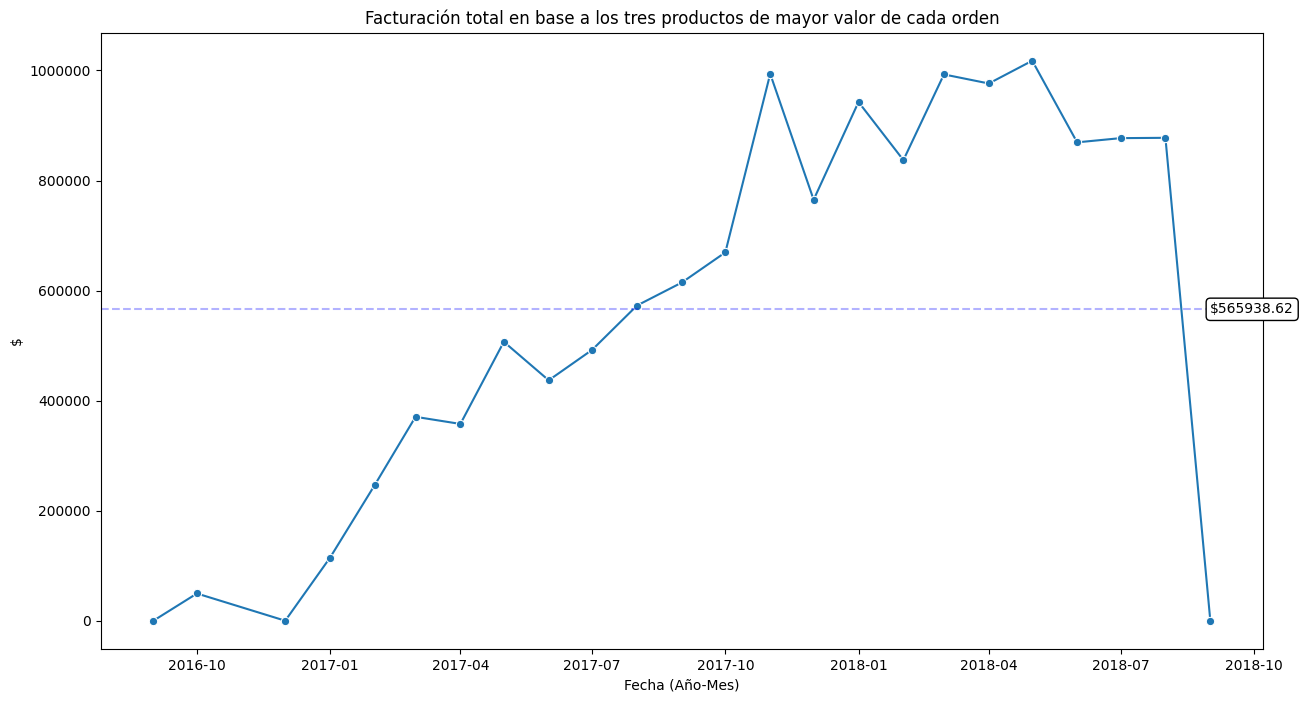

In [45]:
#Creamos df de pandas con la query de la vista temporal E (para poder graficar)
query_B = query_B.toPandas()

# Crear una columna de fecha única
query_B['date'] = query_B['Year'].astype(str) + '-' + query_B['Month'].astype(str).str.zfill(2)
query_B['date'] = pd.to_datetime(query_B['date'], format='%Y-%m')

# Calcular el promedio de 'total_price'
average_total_price = query_B['total_price'].mean()

# Configurar la figura y los ejes
plt.figure(figsize=(15, 8))

sns.lineplot(x='date', y='total_price', data=query_B, marker='o')

# Dibujar una línea horizontal para el promedio
plt.axhline(y=average_total_price, color='blue', linestyle='--', label='Promedio',alpha=0.3)

# Anotar el valor del promedio en la gráfica
plt.text(query_B['date'].iloc[-1], average_total_price, f'${average_total_price:.2f}', ha='left', va='center', color='black',
         bbox=dict(boxstyle='round', facecolor='white', edgecolor='black'))

plt.title('Facturación total en base a los tres productos de mayor valor de cada orden')
plt.xlabel('Fecha (Año-Mes)')
plt.ylabel('$')

# Remover la notación científica del eje Y
plt.ticklabel_format(style='plain', axis='y')



## **BBT2-91** (FRAN) - Creación de Visualización para Análisis J

In [58]:
# Top 10 de monto de compra en tarjeta de crédito agrupado por ciudad
# (sólo tarjeta de crédito mayor al promedio de compras con tarjeta de crédito)

query_J = spark.sql('''
    SELECT
    customer_city,
    ROUND(SUM(sum_payment_value)) as sum_payment_value
    FROM vt_Analysis_J
    WHERE payment_type='credit_card'
    GROUP BY customer_city
    HAVING customer_city IN (SELECT customer_city
                             FROM vt_Analysis_J
                             ORDER BY sum_payment_value DESC
                             LIMIT 10)
    ORDER BY sum_payment_value DESC
    ''')

# YEAR(order_purchase_timestamp) as year,
# MONTH(order_purchase_timestamp) as month,

query_J.show()

+------------------+-----------------+
|     customer_city|sum_payment_value|
+------------------+-----------------+
|         sao paulo|        1041547.0|
|    rio de janeiro|         619542.0|
|          brasilia|         191046.0|
|           goiania|          68555.0|
|             belem|          57022.0|
|      campo grande|          40140.0|
|       joao pessoa|          36919.0|
|              maua|          27588.0|
|          araruama|          13342.0|
|bom jesus do galho|           4562.0|
+------------------+-----------------+



In [63]:
# Top 10 de monto de compra en tarjeta de crédito agrupado por ciudad, año y mes
# (sólo tarjeta de crédito mayor al promedio de compras con tarjeta de crédito)

query_J = spark.sql('''
    SELECT
          customer_city,
          YEAR(order_purchase_timestamp) as Year,
          MONTH(order_purchase_timestamp) as Month,
          ROUND(SUM(sum_payment_value)) as sum_payment_value
    FROM
          vt_Analysis_J
    WHERE
          payment_type='credit_card'
    GROUP BY
          customer_city,Year,Month
    HAVING
          customer_city IN (SELECT customer_city
                             FROM vt_Analysis_J
                             ORDER BY sum_payment_value DESC
                             LIMIT 10)
    ORDER BY
          customer_city,Year,Month
    ''')

query_J.show()

+-------------+----+-----+-----------------+
|customer_city|Year|Month|sum_payment_value|
+-------------+----+-----+-----------------+
|     araruama|2017|    4|           7572.0|
|     araruama|2017|    6|            166.0|
|     araruama|2017|    7|            382.0|
|     araruama|2017|    8|            350.0|
|     araruama|2017|    9|            431.0|
|     araruama|2017|   11|            565.0|
|     araruama|2017|   12|           1764.0|
|     araruama|2018|    1|           1170.0|
|     araruama|2018|    5|            372.0|
|     araruama|2018|    8|            572.0|
|        belem|2017|    1|            269.0|
|        belem|2017|    2|           5202.0|
|        belem|2017|    3|           4255.0|
|        belem|2017|    5|           1916.0|
|        belem|2017|    6|           1277.0|
|        belem|2017|    7|           1081.0|
|        belem|2017|    8|           5587.0|
|        belem|2017|    9|           1436.0|
|        belem|2017|   10|           1648.0|
|        b

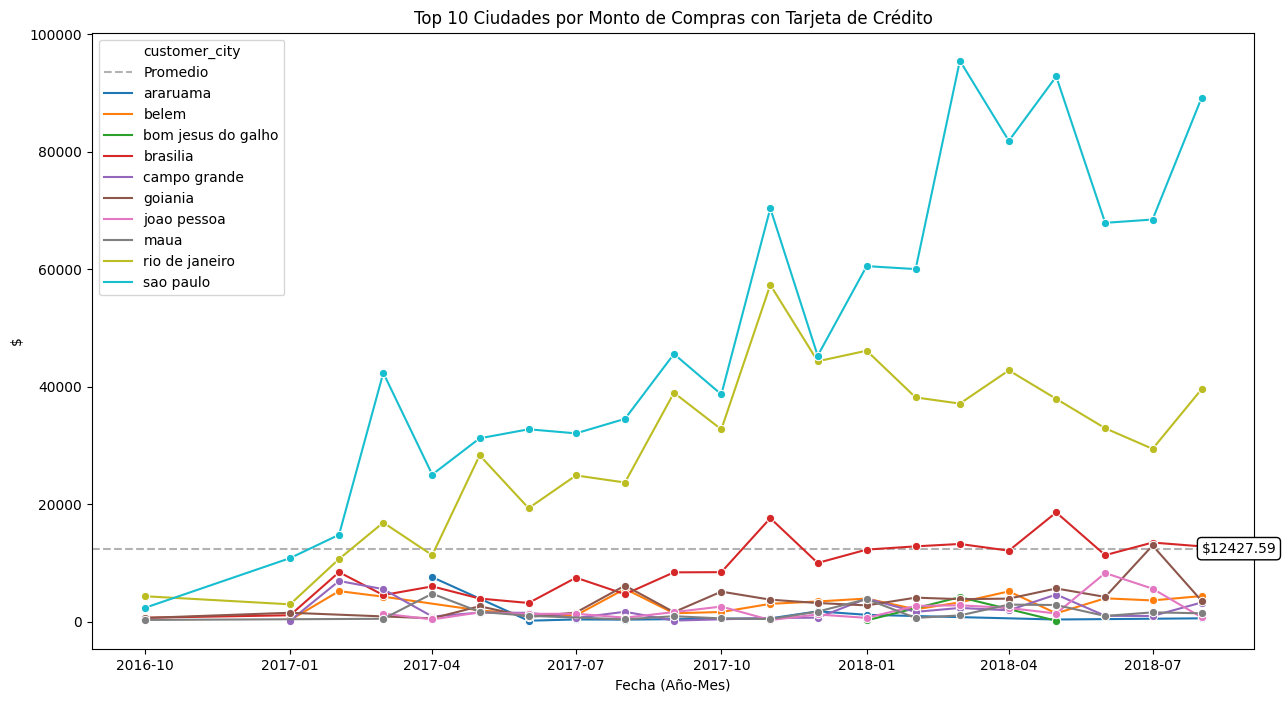

In [75]:
#Creamos df de pandas con la query de la vista temporal E (para poder graficar)
#query_J = query_J.toPandas()

# Crear una columna de fecha única
query_J['date'] = query_J['Year'].astype(str) + '-' + query_J['Month'].astype(str).str.zfill(2)
query_J['date'] = pd.to_datetime(query_J['date'], format='%Y-%m')

# Calcular el promedio de 'sum_payment_value'
average_sum_payment_value = query_J['sum_payment_value'].mean()

# Configurar la figura y los ejes
plt.figure(figsize=(15, 8))

# Dibujar una línea horizontal para el promedio
plt.axhline(y=average_sum_payment_value, color='black', linestyle='--', label='Promedio',alpha=0.3)

# Anotar el valor del promedio en la gráfica
plt.text(query_J['date'].iloc[-1], average_sum_payment_value, f'${average_sum_payment_value:.2f}', ha='left', va='center', color='black',
         bbox=dict(boxstyle='round', facecolor='white', edgecolor='black'))

sns.lineplot(x='date', y='sum_payment_value', hue='customer_city', data=query_J, marker='o')

plt.title('Top 10 Ciudades por Monto de Compras con Tarjeta de Crédito')
plt.xlabel('Fecha (Año-Mes)')
plt.ylabel('$')

# Remover la notación científica del eje Y
plt.ticklabel_format(style='plain', axis='y')

In [77]:
# Top 7 de monto de compra en tarjeta de crédito agrupado por ciudad, año y mes
# (sólo tarjeta de crédito mayor al promedio de compras con tarjeta de crédito)
# Sin Brasilia, Sao Paolo y Rio de Janeiro

query_J_bis = spark.sql('''
    SELECT
          customer_city,
          YEAR(order_purchase_timestamp) as Year,
          MONTH(order_purchase_timestamp) as Month,
          ROUND(SUM(sum_payment_value)) as sum_payment_value
    FROM
          vt_Analysis_J
    WHERE
          payment_type='credit_card'
    GROUP BY
          customer_city,Year,Month
    HAVING
          customer_city IN (SELECT customer_city
                             FROM vt_Analysis_J
                             WHERE customer_city NOT IN ('rio de janeiro','sao paulo','brasilia')
                             ORDER BY sum_payment_value DESC
                             LIMIT 7)
    ORDER BY
          customer_city DESC,Year,Month
    ''')

query_J_bis.show()

+-------------+----+-----+-----------------+
|customer_city|Year|Month|sum_payment_value|
+-------------+----+-----+-----------------+
|         maua|2016|   10|            297.0|
|         maua|2017|    3|            494.0|
|         maua|2017|    4|           4764.0|
|         maua|2017|    5|           1680.0|
|         maua|2017|    6|           1003.0|
|         maua|2017|    8|            398.0|
|         maua|2017|    9|            932.0|
|         maua|2017|   10|            558.0|
|         maua|2017|   11|            455.0|
|         maua|2017|   12|           1714.0|
|         maua|2018|    1|           3841.0|
|         maua|2018|    2|            646.0|
|         maua|2018|    3|           1070.0|
|         maua|2018|    4|           2905.0|
|         maua|2018|    5|           2836.0|
|         maua|2018|    6|            974.0|
|         maua|2018|    7|           1591.0|
|         maua|2018|    8|           1428.0|
|  joao pessoa|2017|    3|           1375.0|
|  joao pe

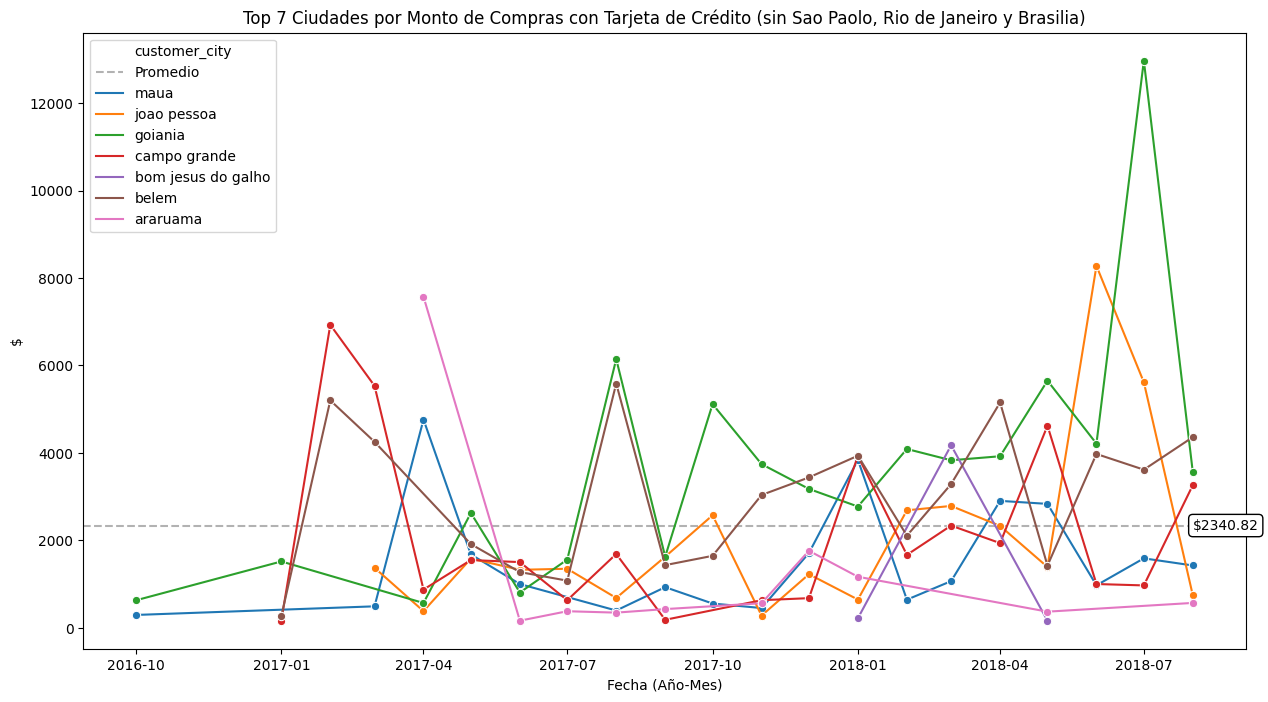

In [79]:
#Creamos df de pandas con la query de la vista temporal E (para poder graficar)
query_J_bis = query_J.toPandas()

# Crear una columna de fecha única
query_J_bis['date'] = query_J_bis['Year'].astype(str) + '-' + query_J_bis['Month'].astype(str).str.zfill(2)
query_J_bis['date'] = pd.to_datetime(query_J_bis['date'], format='%Y-%m')

# Calcular el promedio de 'sum_payment_value'
average_sum_payment_value = query_J_bis['sum_payment_value'].mean()

# Configurar la figura y los ejes
plt.figure(figsize=(15, 8))

# Dibujar una línea horizontal para el promedio
plt.axhline(y=average_sum_payment_value, color='black', linestyle='--', label='Promedio',alpha=0.3)

# Anotar el valor del promedio en la gráfica
plt.text(query_J_bis['date'].iloc[-1], average_sum_payment_value, f'${average_sum_payment_value:.2f}', ha='left', va='center', color='black',
         bbox=dict(boxstyle='round', facecolor='white', edgecolor='black'))

sns.lineplot(x='date', y='sum_payment_value', hue='customer_city', data=query_J_bis, marker='o')

plt.title('Top 7 Ciudades por Monto de Compras con Tarjeta de Crédito (sin Sao Paolo, Rio de Janeiro y Brasilia)')
plt.xlabel('Fecha (Año-Mes)')
plt.ylabel('$')

# Remover la notación científica del eje Y
plt.ticklabel_format(style='plain', axis='y')